In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [6]:
df = pd.read_excel('Superstorecleaned.xlsx')

In [7]:
furniture = df.loc[df['Category'] == 'Furniture']

In [9]:
furniture['Order_Date'].min(), furniture['Order_Date'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))

In [11]:
cols = ['Row ID', 'Order ID', 'Ship_Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City','Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order_Date')
furniture.isnull().sum()

Sales             0
Shipping Cost     0
Order Priority    0
Order_Date        0
dtype: int64

In [12]:
furniture = furniture.groupby('Order_Date')['Sales'].sum().reset_index()

In [13]:
furniture = furniture.set_index('Order_Date')
furniture.index

DatetimeIndex(['2017-01-01', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-10',
               '2017-01-11', '2017-01-12',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Order_Date', length=1331, freq=None)

In [14]:
y = furniture['Sales'].resample('MS').mean()

In [15]:
y['2020':]

Order_Date
2020-01-01    2492.838239
2020-02-01    2508.818696
2020-03-01    3450.206981
2020-04-01    2351.695310
2020-05-01    3277.070130
2020-06-01    4861.539718
2020-07-01    2839.458793
2020-08-01    4510.137246
2020-09-01    5859.221423
2020-10-01    4356.705863
2020-11-01    5628.288940
2020-12-01    5725.612620
Freq: MS, Name: Sales, dtype: float64

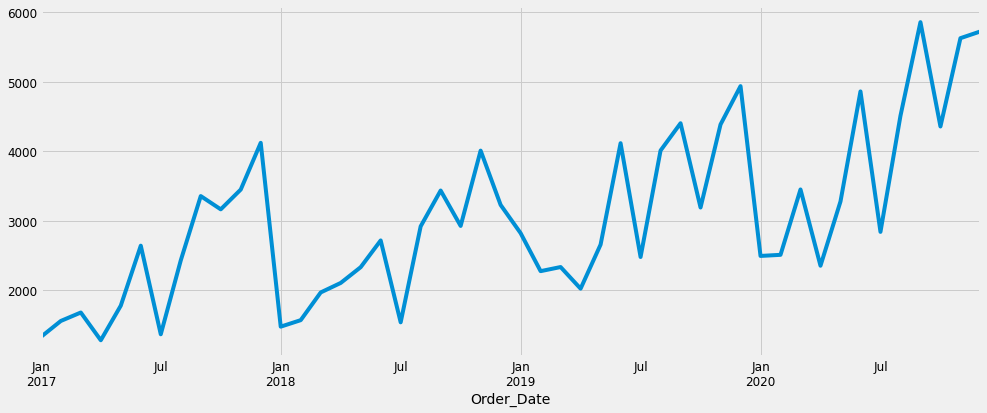

In [16]:
y.plot(figsize=(15, 6))
plt.show()

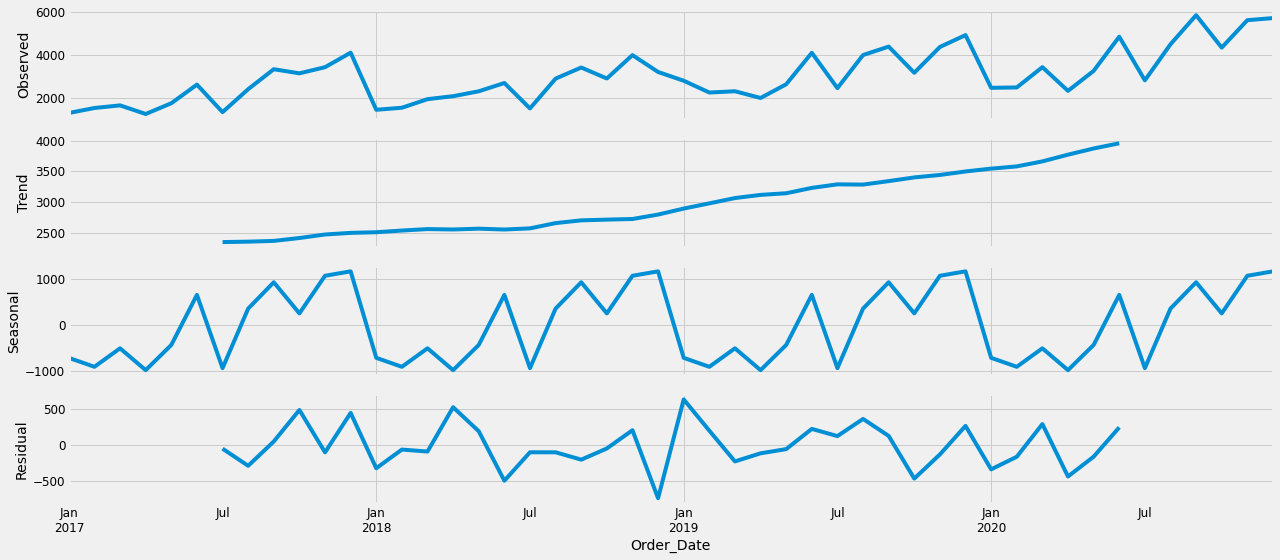

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [18]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:896.8626125722099
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1498.4933950648647
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:568.1100867449319
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:561.8279224155574
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1186.3449286758382
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:394.9835925793823
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:834.6620168331007
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3001.8258381872565
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:548.342883224798
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:563.7281507799419
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:391.1968626432582
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:775.3333014965007
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1593.629271559957
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:551.4424292591625
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:567.4138459724049
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1485.3989573221036
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:362.3679440710336
ARIMA(0, 1, 1)x(0, 0,

In [23]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0967      0.461      0.210      0.834      -0.807       1.001
ma.L1         -0.8112      0.292     -2.774      0.006      -1.384      -0.238
ar.S.L12      -0.4447      0.154     -2.880      0.004      -0.747      -0.142
sigma2      2.273e+05      9e+04      2.525      0.012    5.09e+04    4.04e+05


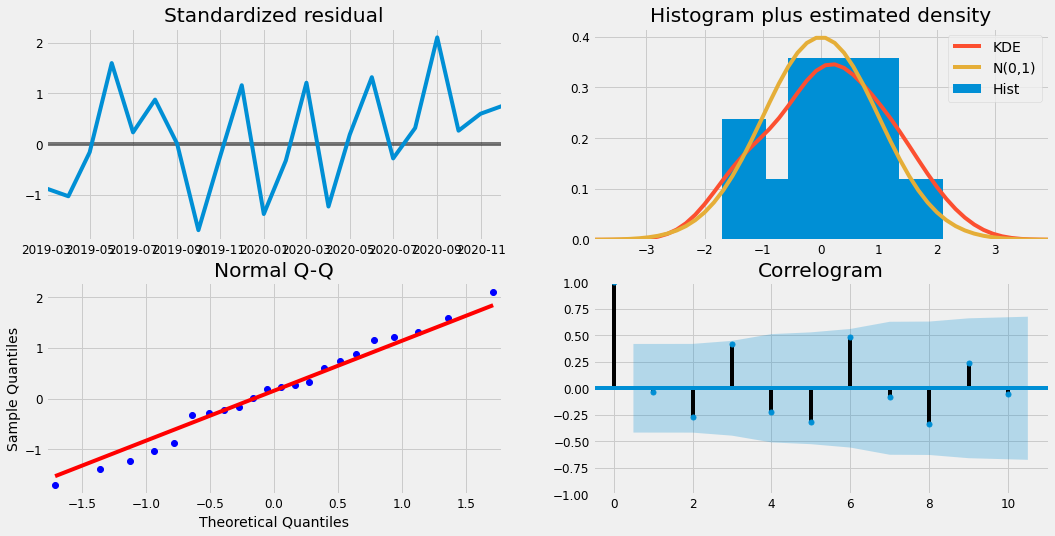

In [24]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

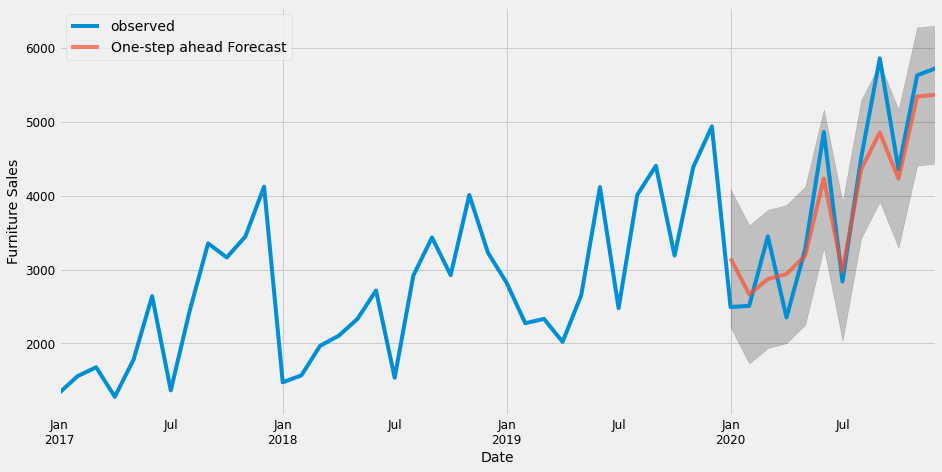

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 235228.94


In [29]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 485.0


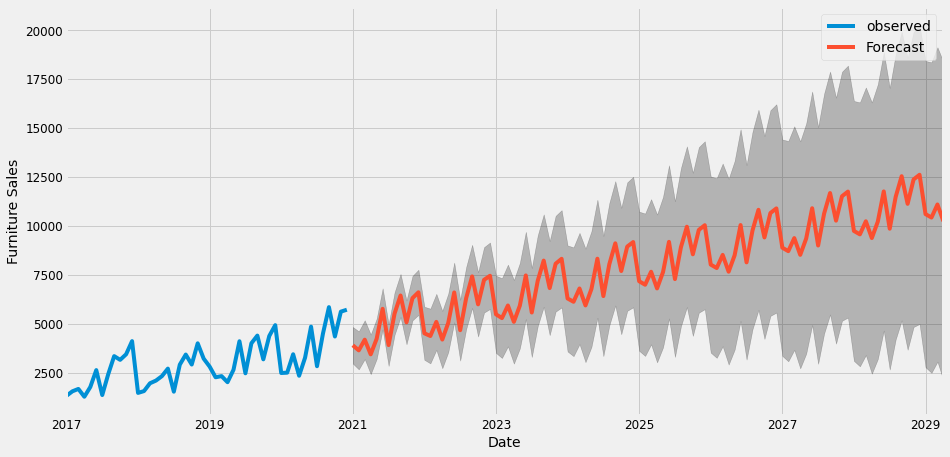

In [30]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [37]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((9860, 21), (31289, 21))

In [38]:
cols = ['Row ID', 'Order ID', 'Ship_Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order_Date')
office = office.sort_values('Order_Date')
furniture = furniture.groupby('Order_Date')['Sales'].sum().reset_index()
office = office.groupby('Order_Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order_Date')
office = office.set_index('Order_Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order_Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order_Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order_Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order_Date,furniture_sales,office_sales
0,2017-01-01,1325.528962,1156.094052
1,2017-02-01,1556.495109,1045.401172
2,2017-03-01,1678.219783,1088.915883
3,2017-04-01,1278.731046,1687.506181
4,2017-05-01,1777.452571,1776.123986


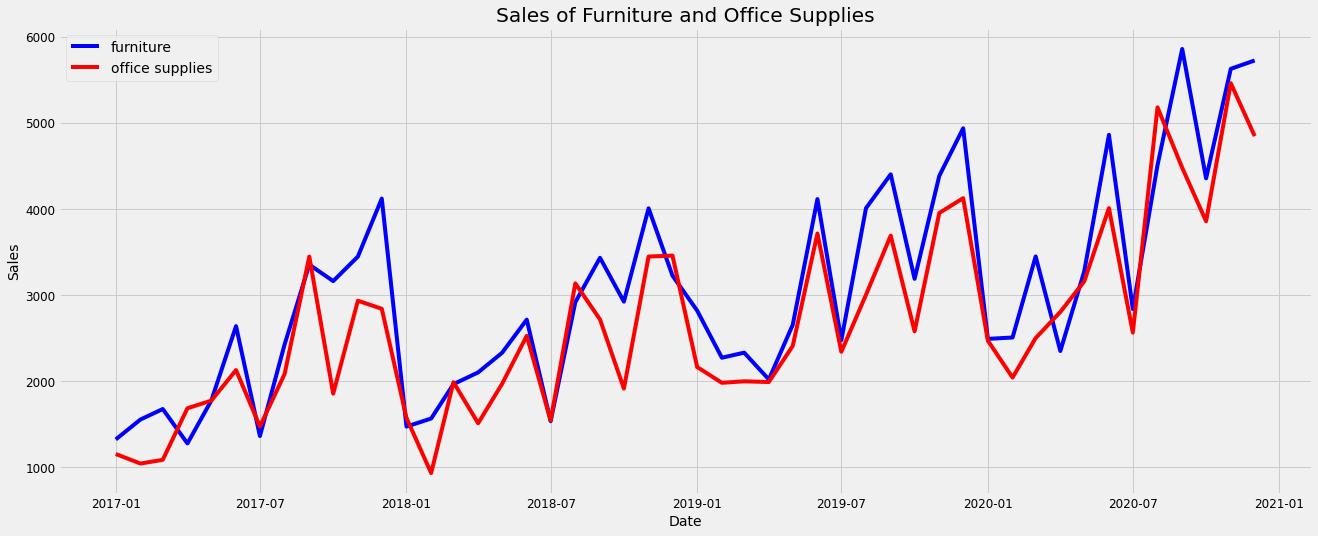

In [40]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order_Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order_Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

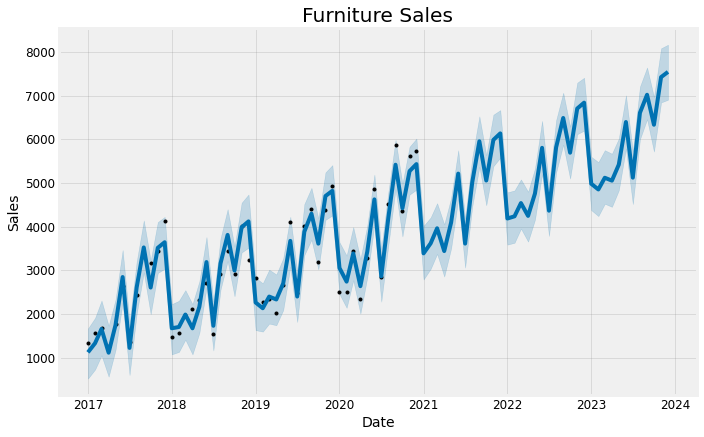

In [41]:
from fbprophet import Prophet
furniture = furniture.rename(columns={'Order_Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order_Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

<Figure size 1296x432 with 0 Axes>

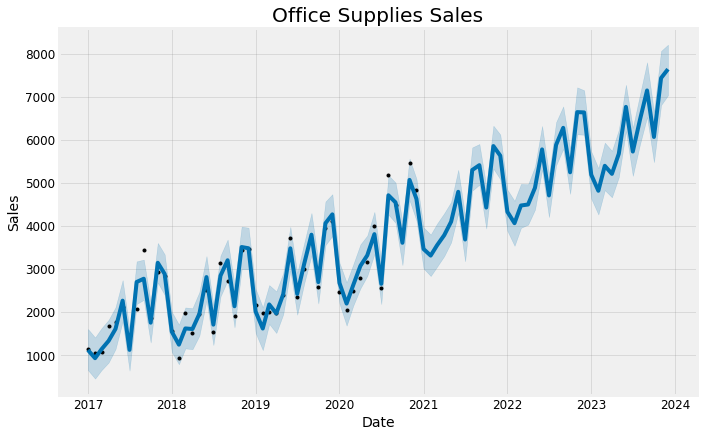

In [42]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

In [43]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,furniture_yearly_lower,furniture_yearly_upper,furniture_multiplicative_terms,furniture_multiplicative_terms_lower,furniture_multiplicative_terms_upper,furniture_yhat,office_trend,office_yhat_lower,office_yhat_upper,office_trend_lower,office_trend_upper,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2017-01-01,2044.606983,521.821802,1668.324890,2044.606983,2044.606983,-921.222981,-921.222981,-921.222981,-921.222981,-921.222981,-921.222981,0.0,0.0,0.0,1123.384001,1642.342879,658.224119,1611.766435,1642.342879,1642.342879,-518.073304,-518.073304,-518.073304,-518.073304,-518.073304,-518.073304,0.0,0.0,0.0,1124.269576
1,2017-02-01,2081.376652,730.647665,1911.202797,2081.376652,2081.376652,-748.999756,-748.999756,-748.999756,-748.999756,-748.999756,-748.999756,0.0,0.0,0.0,1332.376896,1676.646999,461.121554,1415.768127,1676.646999,1676.646999,-742.074902,-742.074902,-742.074902,-742.074902,-742.074902,-742.074902,0.0,0.0,0.0,934.572097
2,2017-03-01,2114.587966,1052.916060,2307.229869,2114.587966,2114.587966,-456.951485,-456.951485,-456.951485,-456.951485,-456.951485,-456.951485,0.0,0.0,0.0,1657.636481,1707.631366,658.113837,1630.115063,1707.631366,1707.631366,-566.248106,-566.248106,-566.248106,-566.248106,-566.248106,-566.248106,0.0,0.0,0.0,1141.383260
3,2017-04-01,2151.357635,566.063393,1728.946295,2151.357635,2151.357635,-1036.542628,-1036.542628,-1036.542628,-1036.542628,-1036.542628,-1036.542628,0.0,0.0,0.0,1114.815007,1741.935486,834.889346,1824.740825,1741.935486,1741.935486,-404.803341,-404.803341,-404.803341,-404.803341,-404.803341,-404.803341,0.0,0.0,0.0,1337.132145
4,2017-05-01,2186.941185,1177.550646,2331.657875,2186.941185,2186.941185,-438.609610,-438.609610,-438.609610,-438.609610,-438.609610,-438.609610,0.0,0.0,0.0,1748.331576,1775.133022,1147.733576,2116.805499,1775.133022,1775.133022,-160.481989,-160.481989,-160.481989,-160.481989,-160.481989,-160.481989,0.0,0.0,0.0,1614.651033


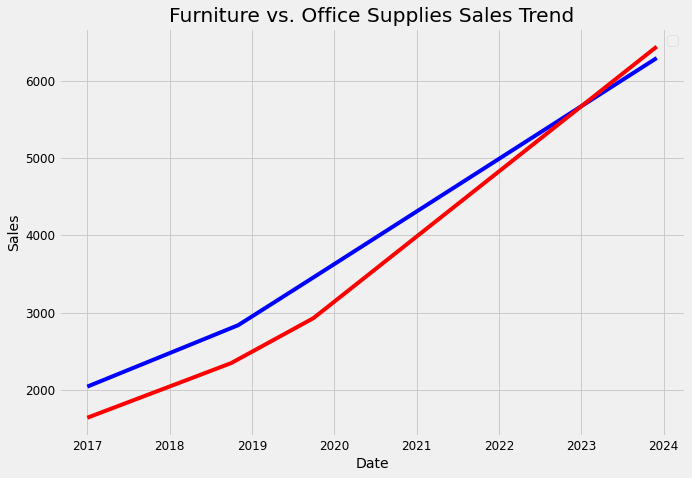

In [44]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

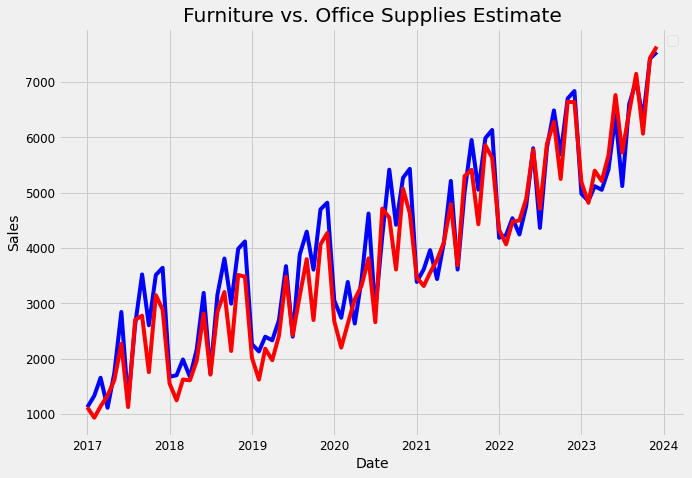

In [45]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

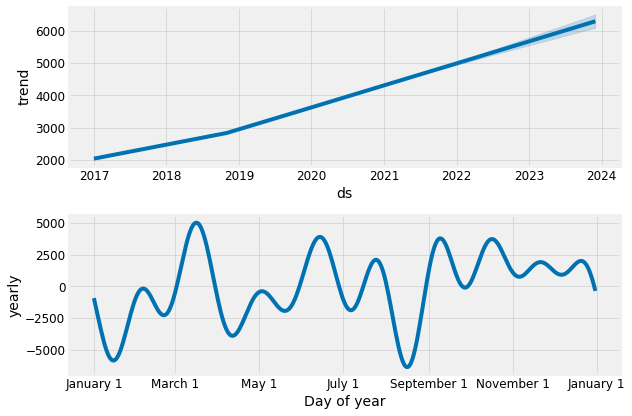

In [46]:
furniture_model.plot_components(furniture_forecast);

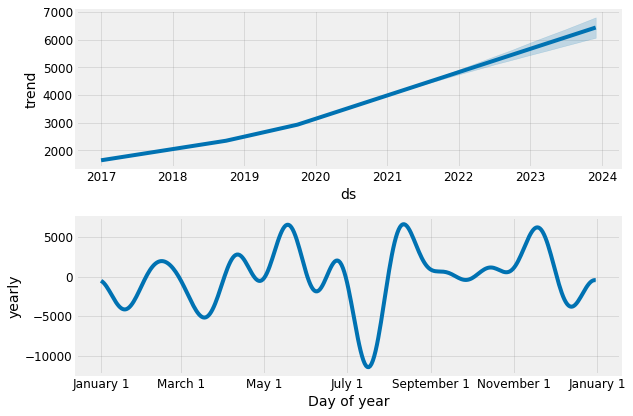

In [47]:
office_model.plot_components(office_forecast);